For this project, I will analyze Metro Interstate Traffic Volume Data Set from UCI Machine Learning Repository.
(http://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume)

The data contains the following fields:


| Columns Name | Description|
|------|------|
|holiday|Categorical US National holidays plus regional holiday, Minnesota State Fair |
|temp|Numeric Average temp in kelvin |
|rain_1h|Numeric Amount in mm of rain that occurred in the hour |
|snow_1h|Numeric Amount in mm of snow that occurred in the hour |
|clouds_all|Numeric Percentage of cloud cover|
|weather_main|Categorical Short textual description of the current weather|
|weather_description|Categorical Longer textual description of the current weather |
|date_time|DateTime Hour of the data collected in local CST time |
|traffic_volume|Numeric Hourly I-94 ATR 301 reported westbound traffic volume|


I will try to do trafffic volume forecasting with Facebook Prophets.

In [9]:
#import libraries
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas_profiling
import datetime
from fbprophet import Prophet

In [10]:
df = pd.read_csv('/Users/David_Tsai/Desktop/Data/Metro_Interstate_Traffic_Volume.csv')

In [11]:
df.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [12]:
df.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [13]:
profile = pandas_profiling.ProfileReport(df)
display(profile)

Number of variables,9
Number of observations,48204
Total Missing (%),0.0%
Total size in memory,3.3 MiB
Average record size in memory,72.0 B
Numeric,5
Categorical,4
Boolean,0
Date,0
Text (Unique),0
Rejected,0


In [14]:
#Include date time and traffic volume only
df = df[['date_time', 'traffic_volume']]

In [15]:
df['date_time']= pd.to_datetime(df['date_time'])

In [16]:
df.head()

,date_time,traffic_volume
0,2012-10-02 09:00:00,5545
1,2012-10-02 10:00:00,4516
2,2012-10-02 11:00:00,4767
3,2012-10-02 12:00:00,5026
4,2012-10-02 13:00:00,4918


Deal with Missing Dates

There are some missing dates, especially in 2015.

In [17]:
df= df.groupby(['date_time'], as_index=False).sum()

In [18]:
r = pd.date_range(start= df.date_time.min(), end= df.date_time.max(), freq ='H')
df = df.set_index('date_time').reindex(r).interpolate()
#or fillna(value=df['traffic_volume'].mean())
df = df.reset_index().rename(columns={'index': 'date_time'})

In [19]:
#change columns name to fit prophet model
df.columns = ['ds', 'y']

In [20]:
df

,ds,y
0,2012-10-02 09:00:00,5545.000000
1,2012-10-02 10:00:00,4516.000000
2,2012-10-02 11:00:00,4767.000000
3,2012-10-02 12:00:00,5026.000000
4,2012-10-02 13:00:00,4918.000000
5,2012-10-02 14:00:00,5181.000000
6,2012-10-02 15:00:00,5584.000000
7,2012-10-02 16:00:00,6015.000000
8,2012-10-02 17:00:00,5791.000000
9,2012-10-02 18:00:00,4770.000000


Downsampling dataframe from Hourly to Daily data

In [21]:
df.index = df['ds']
df = df.resample('D').mean()

In [22]:
df= df.reset_index()

In [24]:
df.head()

,ds,y
0,2012-10-02,4219.266667
1,2012-10-03,3682.708333
2,2012-10-04,3747.458333
3,2012-10-05,3964.270833
4,2012-10-06,3141.166667


Fit Prophet to dataframe

In [25]:
p = Prophet(daily_seasonality=True)
p.fit(df)

Make dataframe for forecasting

In [26]:
future = p.make_future_dataframe(periods=365, freq = 'D')

In [27]:
future.tail()

,ds
2550,2019-09-26
2551,2019-09-27
2552,2019-09-28
2553,2019-09-29
2554,2019-09-30


Predict future traffic volume

In [31]:
forecast = p.predict(future)

In [32]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
2550,2019-09-26,4122.226657,2565.738902,5734.432856
2551,2019-09-27,4106.263510,2481.681339,5735.244361
2552,2019-09-28,3256.393414,1647.696908,4878.832294
2553,2019-09-29,2838.182880,1251.613206,4468.067959
2554,2019-09-30,3909.054273,2241.799133,5503.838135


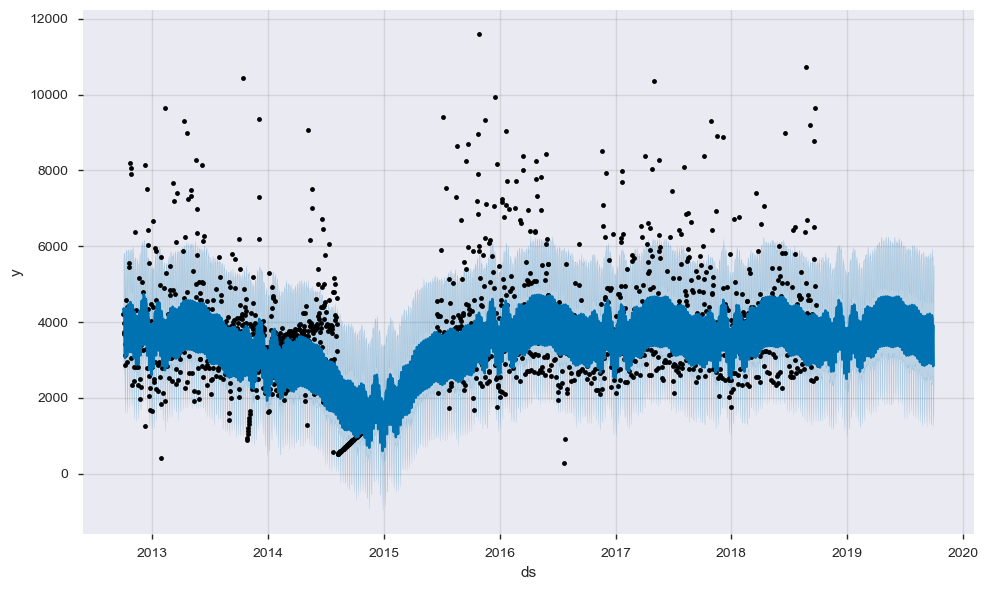

In [33]:
fig_p = p.plot(forecast)

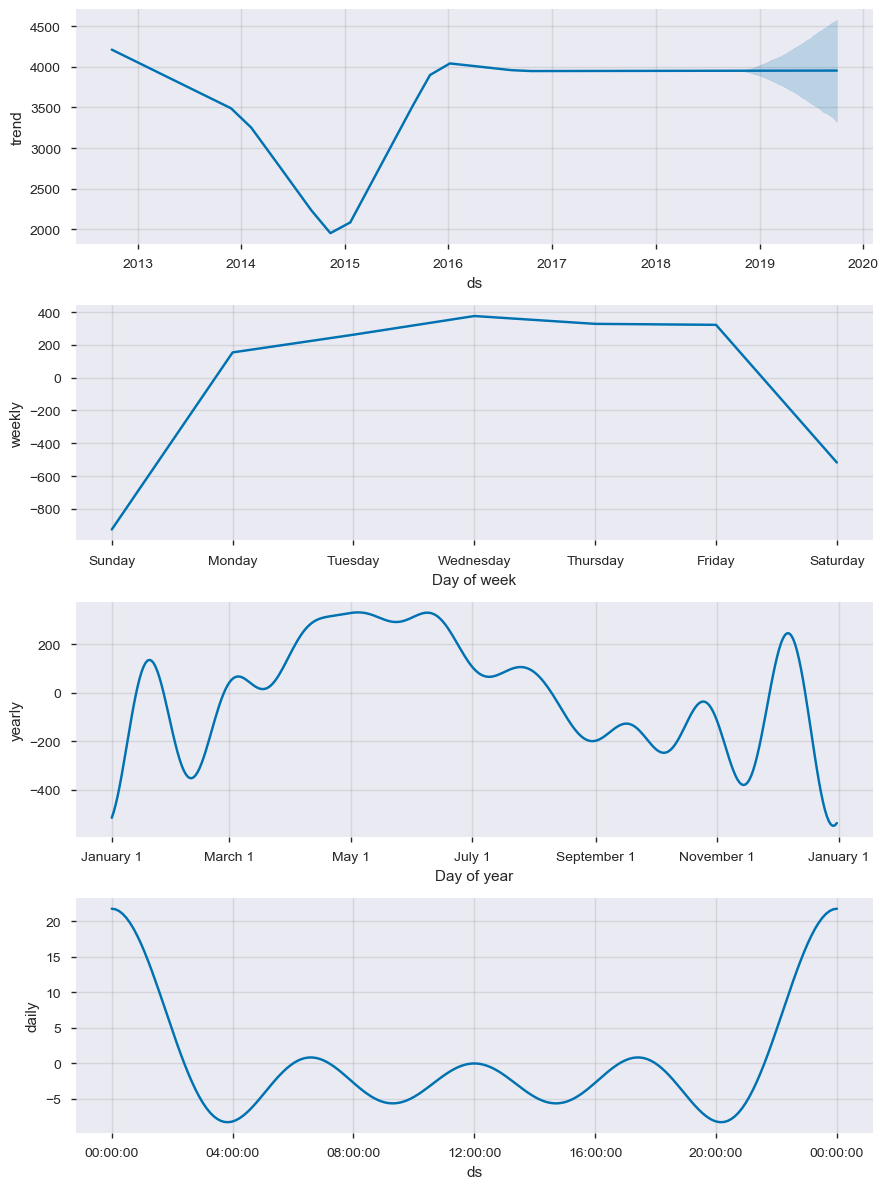

In [34]:
fig_p2 = p.plot_components(forecast)

Diagnostics
Use cross validation to measure forecast error

In [35]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(p, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

INFO:fbprophet:Making 7 forecasts with cutoffs between 2014-10-16 00:00:00 and 2017-09-30 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2014-10-17,2161.760203,770.900512,3693.264858,1058.369704,2014-10-16
1,2014-10-18,1300.243743,-164.751795,2682.461234,1066.069717,2014-10-16
2,2014-10-19,840.155156,-630.644944,2351.047257,1073.769731,2014-10-16
3,2014-10-20,1906.310924,454.129419,3409.698814,1081.469744,2014-10-16
4,2014-10-21,1898.665269,541.282468,3313.107646,1089.169758,2014-10-16


In [36]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mape,coverage
0,37 days,1.870104e+06,1367.517605,878.721838,0.244364,0.790476
1,38 days,1.905246e+06,1380.306360,888.990649,0.246548,0.788796
2,39 days,1.906301e+06,1380.688685,887.087637,0.245944,0.790476
3,40 days,1.922381e+06,1386.499427,889.409794,0.245618,0.788235
4,41 days,1.935088e+06,1391.074512,890.548751,0.243792,0.786555


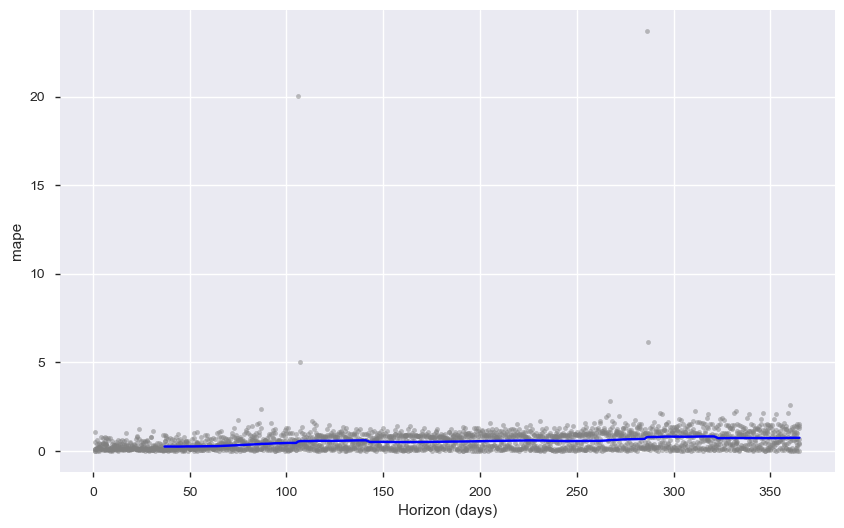

In [37]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')